# Hands On Tutorial

## Example 1

Create random sat formula and check if a random assignment satisfies the formula. 

In [1]:
from src.generator import UniformCNFGenerator, SRnGenerator
import src.utils as utils

In [2]:
# Create a sat generator
sat_gen = UniformCNFGenerator(min_n = 5,
                              max_n = 5,
                              min_k = 3,
                              max_k = 3,
                              min_r = 4.2,
                              max_r = 4.2)

In [3]:
# Create a random sat formula
n, r, m, formula = sat_gen.generate_formula()

print(f'n: {n}')
print(f'r: {r}')
print(f'm: {m}')
print(formula)

n: 5
r: 4.2
m: 21
[[1, -2, 3], [-4, -1, -5], [5, 4, -3], [-1, 4, 2], [-2, 5, 3], [3, 2, 1], [-1, -4, 5], [-3, 5, -4], [5, 1, -3], [-5, 1, -2], [-4, -2, -3], [-2, -4, -1], [5, 3, -4], [2, -4, 1], [-5, 2, -1], [1, -2, 5], [5, 3, 2], [-5, -1, 4], [-2, -5, -3], [-2, -3, -1], [-2, 3, -1]]


In [4]:
# Create a random assignment
assignment = utils.random_assignment(n=n)

print(assignment)

[0 0 0 0 0]


In [12]:
# Verifying whether the assinment satisfied the formula
is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)

print(f'assignment sats the formula: {is_sat}')
print(f'num of sat clauses: {num_sat} out of {m}')

assignment sats the formula: False
num of sat clauses: 20 out of 21


## Example 2

Load a sat formula from the SATLIB dataset and check if a random assignment satisfies the formula.

SATLIB: https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html

In [5]:
from src.generator import UniformCNFGenerator
import src.utils as utils

In [6]:
dimacs_path =  'data/uf20-91/uf20-01.cnf'
n, m, formula = utils.dimacs2list(dimacs_path = dimacs_path)

print(f'n: {n}')
print(f'r: {m/n}')
print(f'm: {m}')
print()
print(formula)

n: 20
r: 4.55
m: 91

[[4, -18, 19], [3, 18, -5], [-5, -8, -15], [-20, 7, -16], [10, -13, -7], [-12, -9, 17], [17, 19, 5], [-16, 9, 15], [11, -5, -14], [18, -10, 13], [-3, 11, 12], [-6, -17, -8], [-18, 14, 1], [-19, -15, 10], [12, 18, -19], [-8, 4, 7], [-8, -9, 4], [7, 17, -15], [12, -7, -14], [-10, -11, 8], [2, -15, -11], [9, 6, 1], [-11, 20, -17], [9, -15, 13], [12, -7, -17], [-18, -2, 20], [20, 12, 4], [19, 11, 14], [-16, 18, -4], [-1, -17, -19], [-13, 15, 10], [-12, -14, -13], [12, -14, -7], [-7, 16, 10], [6, 10, 7], [20, 14, -16], [-19, 17, 11], [-7, 1, -20], [-5, 12, 15], [-4, -9, -13], [12, -11, -7], [-5, 19, -8], [1, 16, 17], [20, -14, -15], [13, -4, 10], [14, 7, 10], [-5, 9, 20], [10, 1, -19], [-16, -15, -1], [16, 3, -11], [-15, -10, 4], [4, -15, -3], [-10, -16, 11], [-8, 12, -5], [14, -6, 12], [1, 6, 11], [-13, -5, -1], [-7, -2, 12], [1, -20, 19], [-2, -13, -8], [15, 18, 4], [-11, 14, 9], [-6, -15, -2], [5, -12, -15], [-6, 17, 5], [-13, 5, -19], [20, -1, 14], [9, -17, 15], [-5

In [7]:
assignment = utils.random_assignment(n=n)

print(assignment)

[1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0]


In [8]:
is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)

print(f'assignment sats the formula: {is_sat}')
print(f'num of sat clauses: {num_sat} out of {m}')

assignment sats the formula: False
num of sat clauses: 79 out of 91


## Example 3

Load a sat formula from the SATLIB dataset and check if MiniSat solver finds an sat assignment.


In [9]:
from src.generator import UniformCNFGenerator
import src.utils as utils
from src.train import train
from PyMiniSolvers import minisolvers

In [10]:
dimacs_path =  'data/uf20-91/uf20-01.cnf'
n, m, formula = utils.dimacs2list(dimacs_path = dimacs_path)

print(f'n: {n}')
print(f'r: {m/n}')
print(f'm: {m}')
print()
print(formula)

n: 20
r: 4.55
m: 91

[[4, -18, 19], [3, 18, -5], [-5, -8, -15], [-20, 7, -16], [10, -13, -7], [-12, -9, 17], [17, 19, 5], [-16, 9, 15], [11, -5, -14], [18, -10, 13], [-3, 11, 12], [-6, -17, -8], [-18, 14, 1], [-19, -15, 10], [12, 18, -19], [-8, 4, 7], [-8, -9, 4], [7, 17, -15], [12, -7, -14], [-10, -11, 8], [2, -15, -11], [9, 6, 1], [-11, 20, -17], [9, -15, 13], [12, -7, -17], [-18, -2, 20], [20, 12, 4], [19, 11, 14], [-16, 18, -4], [-1, -17, -19], [-13, 15, 10], [-12, -14, -13], [12, -14, -7], [-7, 16, 10], [6, 10, 7], [20, 14, -16], [-19, 17, 11], [-7, 1, -20], [-5, 12, 15], [-4, -9, -13], [12, -11, -7], [-5, 19, -8], [1, 16, 17], [20, -14, -15], [13, -4, 10], [14, 7, 10], [-5, 9, 20], [10, 1, -19], [-16, -15, -1], [16, 3, -11], [-15, -10, 4], [4, -15, -3], [-10, -16, 11], [-8, 12, -5], [14, -6, 12], [1, 6, 11], [-13, -5, -1], [-7, -2, 12], [1, -20, 19], [-2, -13, -8], [15, 18, 4], [-11, 14, 9], [-6, -15, -2], [5, -12, -15], [-6, 17, 5], [-13, 5, -19], [20, -1, 14], [9, -17, 15], [-5

In [11]:
S = minisolvers.MinisatSolver()

for i in range(n):
    S.new_var()

for clause in formula:
    S.add_clause(clause)


In [12]:
print(S.solve())

if S.solve():
    assignment = list(S.get_model())
    is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)
    print(f'assignment: {assignment}')
    print(f'assignment sats the formula: {is_sat}')
    print(f'num of sat clauses: {num_sat} out of {m}')

True
assignment: [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]
assignment sats the formula: True
num of sat clauses: 91 out of 91


## Example 4

Create random sat formula and check if the RNN model satisfies the formula. 

In [13]:
from src.architectures import BasicRNN, BaselineRollout
from src.generator import UniformCNFGenerator
import src.utils as utils
from src.train import train

import torch.optim as optim

import matplotlib.pyplot as plt
from PyMiniSolvers import minisolvers


In [14]:
#Create a sat generator
sat_gen = UniformCNFGenerator(min_n = 10,
                              max_n = 10,
                              min_k = 3,
                              max_k = 3,
                              min_r = 4.2,
                              max_r = 4.2)

#Create a random sat formula
n, r, m, formula = sat_gen.generate_formula()

print(f'n: {n}')
print(f'r: {r}')
print(f'm: {m}')
print(formula)

n: 10
r: 4.2
m: 42
[[-7, -2, 4], [-3, 1, -4], [-10, 2, -7], [4, -1, 10], [-9, 5, 6], [3, 5, 8], [1, 3, 9], [-2, 3, -10], [1, -7, 9], [10, -8, 3], [-8, 5, 3], [-10, 7, -1], [-9, -6, -5], [-4, 8, 3], [6, 8, -5], [-3, 1, 5], [7, -2, 10], [-6, -7, -8], [-1, -2, 3], [-10, 5, -6], [2, 8, -7], [9, -6, -4], [-1, -8, -10], [6, -1, -7], [4, 9, 10], [4, 10, -3], [3, 5, -7], [-7, -8, -3], [8, -10, 7], [4, -6, 10], [-3, 8, -6], [1, -10, -7], [-8, -2, -1], [1, 4, 7], [-4, -10, 2], [7, -6, 4], [3, -10, -6], [1, -10, -8], [-5, -3, -7], [-4, 7, -6], [-5, -7, 4], [-10, -3, 7]]


In [12]:
# Network
embedding_size = 64
hidden_size = 256
num_layers = 1
cell = 'LSTM'
dropout = 0

input_size = n  # Num of variables
output_size = 2  # Two assignments: 0 or 1

# Training
lr = 0.001
accumulation_steps = 2
entropy_weight = 0.5
num_episodes = 1000
clip_val = 0.5  # Clip val for gradint clipping: None, 1, 2, 3, ...n
clip_logits = None  # None, 1, 2, 3, ...n

# Baseline
num_rollouts = -1  # Num. of rollouts for baseline. Greedy: -1, #Sampled: 1, 2, 3, ...n
baseline = BaselineRollout(num_rollouts)

verbose = 2

policy_network = BasicRNN(cell, input_size, embedding_size, hidden_size, output_size, num_layers, dropout)

optimizer = optim.Adam(policy_network.parameters(), lr=lr)

history_loss, history_num_sat = train(accumulation_steps, formula, input_size, num_episodes, policy_network, optimizer, baseline, entropy_weight, clip_logits, clip_val, verbose)

Episode [2/1000], Mean Loss 27.9310,  Mean num sat 39.5000
Episode [4/1000], Mean Loss -18.1021,  Mean num sat 34.0000
Episode [6/1000], Mean Loss 9.6560,  Mean num sat 38.0000
Episode [8/1000], Mean Loss -3.2390,  Mean num sat 36.0000
Episode [10/1000], Mean Loss 15.4021,  Mean num sat 39.0000
Episode [12/1000], Mean Loss 9.4202,  Mean num sat 38.0000
Episode [14/1000], Mean Loss -13.2910,  Mean num sat 34.5000
Episode [16/1000], Mean Loss 0.5781,  Mean num sat 36.5000
Episode [18/1000], Mean Loss 12.5837,  Mean num sat 38.5000
Episode [20/1000], Mean Loss 22.2523,  Mean num sat 39.5000
Episode [22/1000], Mean Loss 7.6028,  Mean num sat 38.0000
Episode [24/1000], Mean Loss 19.0761,  Mean num sat 40.0000
Episode [26/1000], Mean Loss 9.1917,  Mean num sat 38.0000
Episode [28/1000], Mean Loss 15.8353,  Mean num sat 39.5000
Episode [30/1000], Mean Loss -8.2263,  Mean num sat 35.0000
Episode [32/1000], Mean Loss 10.2937,  Mean num sat 38.0000
Episode [34/1000], Mean Loss 0.6838,  Mean num 

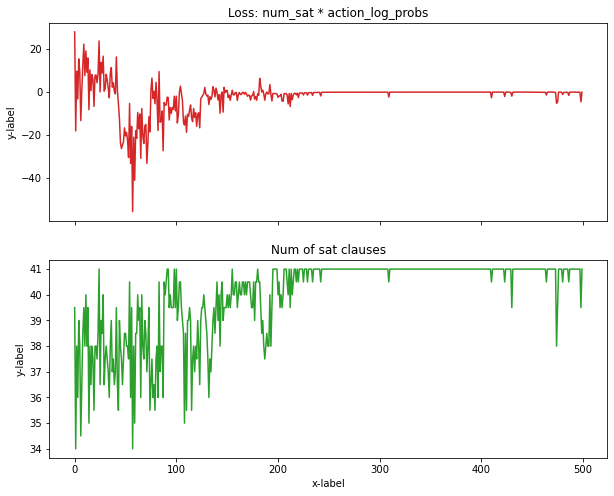

In [13]:
fig, axs = plt.subplots(2, 1,  figsize=(10,8))
axs[0].plot(history_loss, 'tab:red')
axs[0].set_title('Loss: num_sat * action_log_probs')

axs[1].plot(history_num_sat, 'tab:green')
axs[1].set_title('Num of sat clauses')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [14]:
# Testing trained network
assignment = utils.sampling_assignment(policy_network, num_variables=n, strategy='greedy')

# Verifying the number of satisfied clauses
is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)

print(assignment)
print(num_sat)


[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
41


In [15]:
# Solving with MiniSAT
S = minisolvers.MinisatSolver()

for i in range(n):
    S.new_var()

for clause in formula:
    S.add_clause(clause)

print(S.solve())

if S.solve():
    assignment = list(S.get_model())
    is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)
    print(f'assignment: {assignment}')
    print(f'assignment sats the formula: {is_sat}')
    print(f'num of sat clauses: {num_sat} out of {m}')

True
assignment: [0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
assignment sats the formula: True
num of sat clauses: 42 out of 42


## Example 5

Using SATLIB formula

n = 20

r = 4.55

m = (20 * 4.55) = 91

In [45]:
dimacs_path =  'data/uf20-91/uf20-01.cnf'
n, m, formula = utils.dimacs2list(dimacs_path = dimacs_path)

print(f'n: {n}')
print(f'r: {m/n}')
print(f'm: {m}')
print(formula)

n: 20
r: 4.55
m: 91
[[4, -18, 19], [3, 18, -5], [-5, -8, -15], [-20, 7, -16], [10, -13, -7], [-12, -9, 17], [17, 19, 5], [-16, 9, 15], [11, -5, -14], [18, -10, 13], [-3, 11, 12], [-6, -17, -8], [-18, 14, 1], [-19, -15, 10], [12, 18, -19], [-8, 4, 7], [-8, -9, 4], [7, 17, -15], [12, -7, -14], [-10, -11, 8], [2, -15, -11], [9, 6, 1], [-11, 20, -17], [9, -15, 13], [12, -7, -17], [-18, -2, 20], [20, 12, 4], [19, 11, 14], [-16, 18, -4], [-1, -17, -19], [-13, 15, 10], [-12, -14, -13], [12, -14, -7], [-7, 16, 10], [6, 10, 7], [20, 14, -16], [-19, 17, 11], [-7, 1, -20], [-5, 12, 15], [-4, -9, -13], [12, -11, -7], [-5, 19, -8], [1, 16, 17], [20, -14, -15], [13, -4, 10], [14, 7, 10], [-5, 9, 20], [10, 1, -19], [-16, -15, -1], [16, 3, -11], [-15, -10, 4], [4, -15, -3], [-10, -16, 11], [-8, 12, -5], [14, -6, 12], [1, 6, 11], [-13, -5, -1], [-7, -2, 12], [1, -20, 19], [-2, -13, -8], [15, 18, 4], [-11, 14, 9], [-6, -15, -2], [5, -12, -15], [-6, 17, 5], [-13, 5, -19], [20, -1, 14], [9, -17, 15], [-5,

In [102]:
# Network
embedding_size = 64
hidden_size = 256
num_layers = 1
cell = 'LSTM'
dropout = 0

input_size = n  # Num of variables
output_size = 2  # Two assignments: 0 or 1

# Training
lr = 0.001
accumulation_steps = 2
entropy_weight = 0.0
num_episodes = 1000
clip_val = 1  # Clip val for gradint clipping: None, 1, 2, 3, ...n
clip_logits = None  # None, 1, 2, 3, ...n

# Baseline
num_rollouts = 2  # Num. of rollouts for baseline. Greedy: -1, #Sampled: 1, 2, 3, ...n
baseline = BaselineRollout(num_rollouts)

verbose = 2

policy_network = BasicRNN(cell, input_size, embedding_size, hidden_size, output_size, num_layers, dropout)

optimizer = optim.Adam(policy_network.parameters(), lr=lr)

history_loss, history_num_sat = train(accumulation_steps, formula, input_size, num_episodes, policy_network, optimizer, baseline, entropy_weight, clip_logits, clip_val, verbose)

Episode [2/1000], Mean Loss -20.7571,  Mean num sat 80.5000
Episode [4/1000], Mean Loss -118.5354,  Mean num sat 76.5000
Episode [6/1000], Mean Loss -96.2958,  Mean num sat 74.0000
Episode [8/1000], Mean Loss -9.3588,  Mean num sat 80.0000
Episode [10/1000], Mean Loss 35.5902,  Mean num sat 81.0000
Episode [12/1000], Mean Loss -13.7266,  Mean num sat 79.0000
Episode [14/1000], Mean Loss -27.9834,  Mean num sat 80.0000
Episode [16/1000], Mean Loss 60.0315,  Mean num sat 84.0000
Episode [18/1000], Mean Loss 45.9265,  Mean num sat 83.0000
Episode [20/1000], Mean Loss -33.9947,  Mean num sat 81.0000
Episode [22/1000], Mean Loss 5.8354,  Mean num sat 81.0000
Episode [24/1000], Mean Loss 4.1085,  Mean num sat 81.0000
Episode [26/1000], Mean Loss -86.9352,  Mean num sat 74.0000
Episode [28/1000], Mean Loss 51.4441,  Mean num sat 83.0000
Episode [30/1000], Mean Loss -17.3814,  Mean num sat 79.5000
Episode [32/1000], Mean Loss 24.8024,  Mean num sat 78.5000
Episode [34/1000], Mean Loss 45.6038,

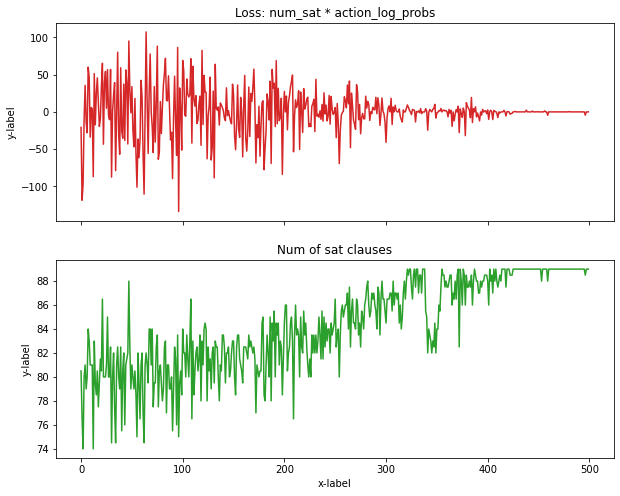

In [103]:
fig, axs = plt.subplots(2, 1,  figsize=(10,8))
axs[0].plot(history_loss, 'tab:red')
axs[0].set_title('Loss: num_sat * action_log_probs')

axs[1].plot(history_num_sat, 'tab:green')
axs[1].set_title('Num of sat clauses')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [104]:
# Testing trained network
assignment = utils.sampling_assignment(policy_network, num_variables=n, strategy='greedy')

# Verifying the number of satisfied clauses
is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)

print(assignment)
print(num_sat)

[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
89


# Example 6

Sampling and assignment from a neural model

In [1]:
from src.utils import sampling_assignment
from src.architectures import BasicRNN

# Network
embedding_size = 32
hidden_size = 128
num_layers = 1
cell = 'LSTM'
dropout = 0

n = 5
input_size = n  # Num of variables
output_size = 2  # Two assignments: 0 or 1

policy_network = BasicRNN(cell, input_size, embedding_size, hidden_size, output_size, num_layers, dropout)

In [9]:
strategy = 'greedy'
actions = sampling_assignment(policy_network, n, strategy)
print(actions)

[1, 0, 1, 1, 1]


In [18]:
import numpy as np
np.random.geometric(0.4)

3

In [20]:

for i in range(20):
    print(1 + np.random.binomial(n=1, p=0.7) + np.random.geometric(0.4))


6
3
2
6
5
3
5
2
2
3
5
6
3
3
3
4
6
3
3
3


## Testing SR(n) generator

In [1]:
from src.generator import UniformCNFGenerator, SRnGenerator
import src.utils as utils
from PyMiniSolvers import minisolvers

# Create a sat generator
sat_gen = SRnGenerator(5)

# Create a SRn SAT formula
n, r, m, formula = sat_gen.generate_formula()

print(f'n: {n}')
print(f'r: {r}')
print(f'm: {m}')

n: 5
r: 8.4
m: 42


In [2]:
#Unsat Formula
S = minisolvers.MinisatSolver()
for _ in range(n):
    S.new_var()
for clause in formula[0]:
    S.add_clause(clause)
print('Formula unsat:')
print(formula[0])
print(f'Is sat?: {S.solve()}')

Formula unsat:
[[-5, 1], [2, 4], [-5, -1, -4], [4, -5, -2, -1, 3], [5, -4, 3, 2], [-4, 5, 1, -2, -3], [3, -4, -2], [-2, -3, 5], [-1, -3, -2, 4, 5], [5, 4, 1], [-2, 3, 4, 1, -5], [-4, 2, -5, -1, 3], [-4, -5, 3, 2, -1], [-4, 2, 5, 1], [-5, -3, 4, -2], [4, -3, 1], [3, -2, -5, -4], [1, -2, 3], [3, 1, 2, 4, -5], [-4, 5, 1, 2], [5, -3, 2, 1], [-5, 2], [2, 3, -4, 1], [-4, -2, 5], [3, -4], [3, -2, -5, -1, -4], [1, 3, -2, -5, 4], [3, 5, 1], [-3, 5, -4, -2, 1], [-1, -2, 3], [-3, 5, 4, 2, 1], [-2, -3, -4, 1], [3, -2, 5, 1, -4], [5, -2, 4], [4, -3, -2, -1], [-2, 4], [-5, -1, 2], [-3, 1, 2, -5], [-3, 2, -5], [4, -5, 2, 1, -3], [-2, 3, -4, 1, 5], [-4, 2, -3]]
Is sat?: False


In [3]:
#Unsat Formula
S = minisolvers.MinisatSolver()
for _ in range(n):
    S.new_var()
for clause in formula[1]:
    S.add_clause(clause)
print('Formula sat:')
print(formula[1])
print(f'Is sat?: {S.solve()}')

Formula sat:
[[-5, 1], [2, 4], [-5, -1, -4], [4, -5, -2, -1, 3], [5, -4, 3, 2], [-4, 5, 1, -2, -3], [3, -4, -2], [-2, -3, 5], [-1, -3, -2, 4, 5], [5, 4, 1], [-2, 3, 4, 1, -5], [-4, 2, -5, -1, 3], [-4, -5, 3, 2, -1], [-4, 2, 5, 1], [-5, -3, 4, -2], [4, -3, 1], [3, -2, -5, -4], [1, -2, 3], [3, 1, 2, 4, -5], [-4, 5, 1, 2], [5, -3, 2, 1], [-5, 2], [2, 3, -4, 1], [-4, -2, 5], [3, -4], [3, -2, -5, -1, -4], [1, 3, -2, -5, 4], [3, 5, 1], [-3, 5, -4, -2, 1], [-1, -2, 3], [-3, 5, 4, 2, 1], [-2, -3, -4, 1], [3, -2, 5, 1, -4], [5, -2, 4], [4, -3, -2, -1], [-2, 4], [-5, -1, 2], [-3, 1, 2, -5], [-3, 2, -5], [4, -5, 2, 1, -3], [-2, 3, -4, 1, 5], [-4, -2, -3]]
Is sat?: True


## Example 8

Create a SR(40) formula an check if the RNN model satisfies the formula. 

In [15]:
from src.architectures import BasicRNN, BaselineRollout
from src.generator import SRnGenerator
import src.utils as utils
from src.train import train

import torch.optim as optim

import matplotlib.pyplot as plt
from PyMiniSolvers import minisolvers

In [36]:
# Create a sat generator
sat_gen = SRnGenerator(40)

# Create a SRn SAT formula
n, r, m, formula = sat_gen.generate_formula()

print(f'n: {n}')
print(f'r: {r}')
print(f'm: {m}')
print()
print(formula[0])
print()
print(formula[1])


n: 40
r: 6.125
m: 245

[[12, -16, 14], [14, -27, 39, 35], [20, 14, 19, 5, -32, 28, -21], [6, 9], [-39, -36], [1, 26, -8, -3, -9], [-11, -40, 34, 4, 38], [26, 32, 29], [-8, -5, -27, -34], [25, -10, -38, 1, 13, 27, -18, 30, 5, 3, 31, 9, 7, 22, -2, -33], [20, 13, 12, 14], [-16, 6, -18, 17, -5, -10, -31, 25], [27, 10], [26, -19, 30], [-32, 39, -6], [-38, 2], [-7, -13, 29], [24, -3, 39, -38], [-3, -13, -4], [-36, -38, 37, 29, 21], [34, 27, -33], [-22, -34, 26], [1, -11, 5], [-37, -29, 15], [19, -12, 18], [40, -26], [-30, 28, 39], [33, -23, 7, 34, -8], [-7, 28], [18, 39, -16], [2, 39], [-17, -13, 16, 19, -36, -31, -33, -6], [-31, 10, 35, 29, 1, 23], [8, -14, -25, -19, 7, -35, 2, 34], [27, -12], [-20, 14, -39], [-17, 22, 21, 19], [24, 39, 28], [-34, -28], [25, -13, 28], [5, 8, -37, -4, 9, 33], [17, 33, 16, 6, -29, -24, -28], [-7, -25, 30], [-33, -1, -10, -37, 12], [13, -15, -33, 19, -24, 21, 38, 35], [29, -21, -31, 11], [-2, 38, -40, 8], [7, -2, 40, -19, 12], [-13, -19], [-15, -19, 38], [-15,

In [37]:
# Instance
#formula = formula[1]

# Network
embedding_size = 128
hidden_size = 512
num_layers = 1
cell = 'LSTM'
dropout = 0

input_size = n  # Num of variables
output_size = 2  # Two assignments: 0 or 1

# Training
lr = 0.001
accumulation_steps = 2
entropy_weight = 0.0
num_episodes = 500
clip_val = None  # Clip val for gradint clipping: None, 1, 2, 3, ...n
clip_logits = None  # None, 1, 2, 3, ...n

# Baseline
num_rollouts = -1  # Num. of rollouts for baseline. Greedy: -1, #Sampled: 1, 2, 3, ...n
baseline = None#BaselineRollout(num_rollouts)

verbose = 2

policy_network = BasicRNN(cell, input_size, embedding_size, hidden_size, output_size, num_layers, dropout)

optimizer = optim.Adam(policy_network.parameters(), lr=lr)

history_loss, history_num_sat = train(accumulation_steps, formula[1], input_size, num_episodes, policy_network, optimizer, baseline, entropy_weight, clip_logits, clip_val, verbose)

Episode [2/500], Mean Loss 6292.1258,  Mean num sat 226.5000
Episode [4/500], Mean Loss 6423.0943,  Mean num sat 223.5000
Episode [6/500], Mean Loss 6239.7626,  Mean num sat 226.0000
Episode [8/500], Mean Loss 5974.0854,  Mean num sat 220.0000
Episode [10/500], Mean Loss 5687.0135,  Mean num sat 222.0000
Episode [12/500], Mean Loss 5697.2143,  Mean num sat 228.5000
Episode [14/500], Mean Loss 4707.1708,  Mean num sat 224.5000
Episode [16/500], Mean Loss 3721.7703,  Mean num sat 222.5000
Episode [18/500], Mean Loss 2767.7288,  Mean num sat 222.0000
Episode [20/500], Mean Loss 1556.1941,  Mean num sat 218.0000
Episode [22/500], Mean Loss 1197.0939,  Mean num sat 220.0000
Episode [24/500], Mean Loss 309.2797,  Mean num sat 221.0000
Episode [26/500], Mean Loss 378.2362,  Mean num sat 221.0000
Episode [28/500], Mean Loss 791.4072,  Mean num sat 222.0000
Episode [30/500], Mean Loss 1204.2434,  Mean num sat 221.0000
Episode [32/500], Mean Loss 205.0301,  Mean num sat 221.0000
Episode [34/500]

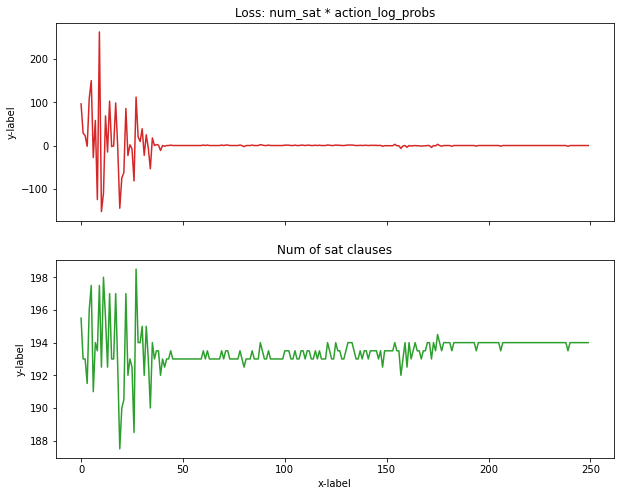

In [33]:
fig, axs = plt.subplots(2, 1,  figsize=(10,8))
axs[0].plot(history_loss, 'tab:red')
axs[0].set_title('Loss: num_sat * action_log_probs')

axs[1].plot(history_num_sat, 'tab:green')
axs[1].set_title('Num of sat clauses')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
from architectures import RNNEncoder

encoder = RNNEncoder(cell='GRU', embedding=None, embedding_size=128, hidden_size=128,
                    num_layers=1, dropout=0)
encoder.eval()
X = torch.zeros((4, 7), dtype=torch.long)
output, state = encoder(X)
output.shape